In [1]:
import numpy as np
from python_speech_features import mfcc
from scipy.io import wavfile
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn import mixture

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
frequency, wave = wavfile.read("agua.wav")
transcription = "agua"

In [3]:
mfccs = mfcc(wave)
mfccs.shape

(165, 13)

In [4]:
num_clusters = len(set(transcription)) + 1
num_clusters

4

In [6]:
gmm = mixture.GaussianMixture(n_components=num_clusters)


In [7]:
gmm.fit(mfccs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
results = gmm.predict(mfccs)
results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
magma = get_cmap("viridis")
colors_array = magma(np.linspace(0,1,num_clusters))
colors_array[:,-1] = 0.5
colors_array

array([[0.267004, 0.004874, 0.329415, 0.5     ],
       [0.190631, 0.407061, 0.556089, 0.5     ],
       [0.20803 , 0.718701, 0.472873, 0.5     ],
       [0.993248, 0.906157, 0.143936, 0.5     ]])

In [12]:
wave_mfcc_ratio = wave.shape[0] / results.shape[0]
wave_mfcc_ratio

161.35757575757575

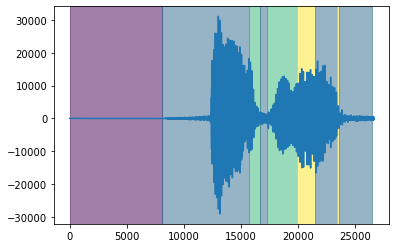

In [14]:
plt.plot(wave)
current_label = 0
current_index = 0
for index, label in enumerate(results):
    if label!= current_label:
        plt.axvspan(current_index,index*wave_mfcc_ratio, color=colors_array[current_label])
        current_label = label
        current_index = index*wave_mfcc_ratio
plt.axvspan(current_index,index*wave_mfcc_ratio, color=colors_array[current_label])
plt.savefig("gmm.png")